<a href="https://colab.research.google.com/github/RaulRMO10/Desafio_6_Classifica-o_em_Machine_Learning/blob/main/Desafio_6_Escola_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

# Etapa 01) Análise exploratória dos dados (Data Understanding)


Nesta primeira etapa, realizamos uma análise exploratória dos dados para entender melhor a estrutura do dataset e identificar possíveis problemas a serem corrigidos antes de realizar análises mais aprofundadas. O dataset possui as seguintes colunas:

* Age: Idade do usuário
* Gender: Gênero do usuário
* Time_on_platform: Tempo total (em minutos) que o usuário passou na plataforma
* Devices_connected: Número de dispositivos conectados
* Subscription_type: Tipo de assinatura (Basic, Standard, Premium)
* Num_streaming_services: Número de serviços de streaming que o usuário utiliza
* Num_active_profiles: Número de perfis ativos na conta
* Avg_rating: Avaliação média dos conteúdos assistidos pelo usuário
* Churned: Indica se o usuário deixou a plataforma (1 para sim, 0 para não)
* User_id: Identificador único do usuário





In [ ]:
# Carregamento do dataset
df = pd.read_csv('/content/streaming_data.csv')
# Exibição das primeiras linhas do dataframe
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# Informações gerais sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
#Estatísticas descritivas das colunas numéricas
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
# Verificação da existência de valores nulos
df.isnull().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

#Etapa 02) Tratamento dos Dados (Data Preparation)
Nesta etapa, realizamos o tratamento dos dados para corrigir valores ausentes e ajustar os tipos de dados, preparando o dataset para análises subsequentes. O código a seguir detalha os passos do tratamento de dados:

In [ ]:
# Preenchimento de valores nulos com 0 em colunas específicas
df['Time_on_platform'].fillna(0, inplace=True)
df['Num_streaming_services'].fillna(0, inplace=True)
df['Churned'].fillna(0, inplace=True)
df['Avg_rating'].fillna(0, inplace=True)
df['Devices_connected'].fillna(0, inplace=True)

In [ ]:
# Remoção de linhas onde as colunas 'Gender', 'Subscription_type' e 'Age' possuem valores nulos
df.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

In [ ]:
# Mapeamento dos valores da coluna 'Churned' de 0/1 para 'No'/'Yes'
df['Churned'] = df['Churned'].map({0: 'No', 1: 'Yes'})

In [ ]:
# Conversão de colunas específicas de float para int
float_columns = ['Age', 'Time_on_platform', 'Devices_connected', 'Avg_rating']
df[float_columns] = df[float_columns].astype(int)

# Etapa 03) Modelagem dos Dados - Regressão Logística
Nesta etapa, construímos um modelo de Regressão Logística para prever se um usuário irá deixar a plataforma (churn). O código a seguir detalha o processo de preparação dos dados para a modelagem, treinamento do modelo, e avaliação de seu desempenho.

In [ ]:
# Preparação dos dados
X = df.drop(columns=['Churned', 'User_id'])

In [ ]:
# Inicialize o LabelEncoder
label_encoder = LabelEncoder()

# Liste as colunas categóricas que você deseja codificar
categorical_columns = ['Gender', 'Subscription_type']

# Aplique o LabelEncoder a cada coluna categórica
df['Churned'] = label_encoder.fit_transform(df['Churned'])

y = df['Churned']

In [ ]:
# Transformação das variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

In [ ]:
# Escalonamento dos dados
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

In [ ]:
# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicialização e treinamento do modelo de Regressão Logística
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Previsão dos valores de teste
y_pred = lr.predict(X_test)

In [ ]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
11843,0.490196,0.706131,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0
12678,0.980392,0.492636,0.6,0.0,0.75,0.8,1.0,0.0,0.0,0.0,1.0,NaN,0
35053,0.274510,0.097500,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,NaN,0
36421,0.411765,0.812992,0.0,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
19202,0.235294,0.303573,0.8,0.0,0.75,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,0.000000,0.8,0.0,1.00,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0
29606,0.470588,0.000000,0.0,0.0,0.50,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
35400,0.313725,0.715493,0.6,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,NaN,0
7825,0.941176,0.000000,0.2,0.0,0.50,0.4,0.0,1.0,1.0,0.0,0.0,NaN,0


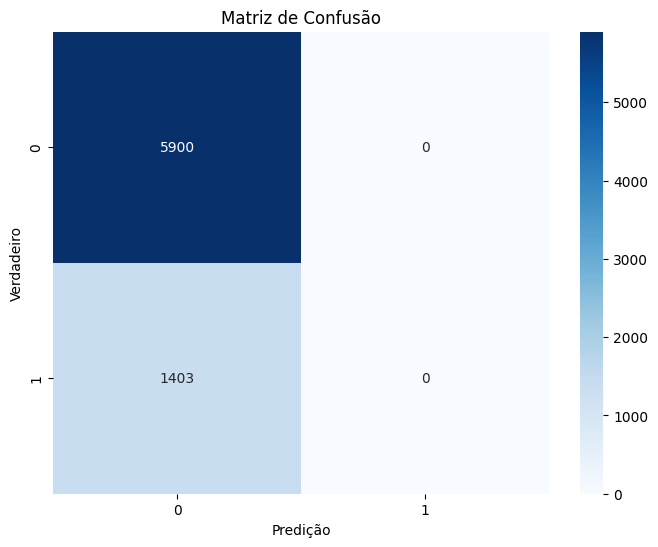

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Impressão das métricas de desempenho
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("------------------------------------")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("------------------------------------")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("------------------------------------")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("------------------------------------")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("------------------------------------")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8064836368615638
Acurácia (Teste): 0.8078871696563056
------------------------------------
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
------------------------------------
Precision (Treino): 0.0
Precision (Teste): 0.0
------------------------------------
Recall (Treino): 0.0
Recall (Teste): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
------------------------------------
ROCAUC (Treino): 0.5127095424717286
ROCAUC (Teste): 0.5064905710523455


# Etapa 04) Modelagem dos Dados - Random Forest
Nesta etapa, construímos um modelo de Random Forest para prever se um usuário irá deixar a plataforma (churn). O código a seguir detalha o processo de preparação dos dados para a modelagem, treinamento do modelo e avaliação de seu desempenho.

In [ ]:
# Inicialização do modelo de Random Forest
rf =  RandomForestClassifier()

In [ ]:
# Treinamento do modelo de Random Forest
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Treinamento do modelo de Random Forest
rf.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
11843,0.490196,0.706131,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0
12678,0.980392,0.492636,0.6,0.0,0.75,0.8,1.0,0.0,0.0,0.0,1.0,NaN,0
35053,0.274510,0.097500,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,NaN,1
36421,0.411765,0.812992,0.0,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1
19202,0.235294,0.303573,0.8,0.0,0.75,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,0.000000,0.8,0.0,1.00,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0
29606,0.470588,0.000000,0.0,0.0,0.50,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
35400,0.313725,0.715493,0.6,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,NaN,0
7825,0.941176,0.000000,0.2,0.0,0.50,0.4,0.0,1.0,1.0,0.0,0.0,NaN,0


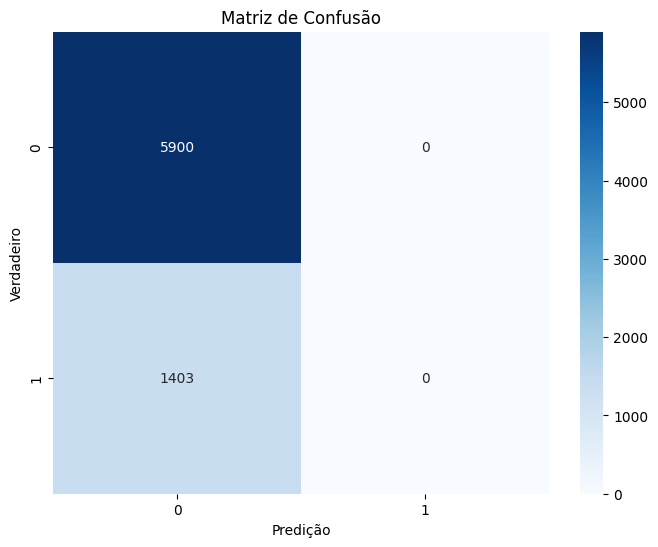

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Impressão das métricas de desempenho
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("------------------------------------")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("------------------------------------")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("------------------------------------")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("------------------------------------")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("------------------------------------")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.994488566342599
Acurácia (Teste): 0.8391072162125154
------------------------------------
Acurácia Balanceada (Treino): 0.988516010858076
Acurácia Balanceada (Teste): 0.6244441692740738
------------------------------------
Precision (Treino): 0.9926444205238608
Precision (Teste): 0.7087912087912088
------------------------------------
Recall (Treino): 0.9787723332743676
Recall (Teste): 0.2758374910905203
------------------------------------
F1-Score (Treino): 0.9856595706778303
F1-Score (Teste): 0.39712673165726015
------------------------------------
ROCAUC (Treino): 0.9997510418813917
ROCAUC (Teste): 0.684235536441282


# Etapa 05) Modelagem dos Dados - Tunning
Nesta etapa, utilizamos o GridSearchCV para otimizar os hiperparâmetros do modelo de Random Forest. O objetivo é melhorar o desempenho preditivo do modelo ao ajustar os parâmetros que influenciam diretamente sua capacidade de generalização e precisão nas previsões.

In [ ]:
# Definição dos parâmetros para Grid Search
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

In [ ]:
# Configuração do GridSearchCV com os parâmetros definidos
grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
# Execução do Grid Search para encontrar os melhores parâmetros
grid_search.fit(X_train, y_train)

In [ ]:
# Melhores parâmetros encontrados pelo GridSearchCV
grid_search.best_estimator_.get_params()

In [ ]:
# Inicialização do modelo de Random Forest
rf = RandomForestClassifier()

In [ ]:
# Utilização dos melhores parâmetros encontrados para criar um novo modelo
rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 300, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=10, n_estimators=300)

In [ ]:
# Treinamento do modelo com os melhores parâmetros
rf_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [ ]:
# Previsão dos valores de teste
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
11843,0.490196,0.706131,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0
12678,0.980392,0.492636,0.6,0.0,0.75,0.8,1.0,0.0,0.0,0.0,1.0,NaN,0
35053,0.274510,0.097500,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,NaN,0
36421,0.411765,0.812992,0.0,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
19202,0.235294,0.303573,0.8,0.0,0.75,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,0.000000,0.8,0.0,1.00,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0
29606,0.470588,0.000000,0.0,0.0,0.50,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
35400,0.313725,0.715493,0.6,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,NaN,0
7825,0.941176,0.000000,0.2,0.0,0.50,0.4,0.0,1.0,1.0,0.0,0.0,NaN,0


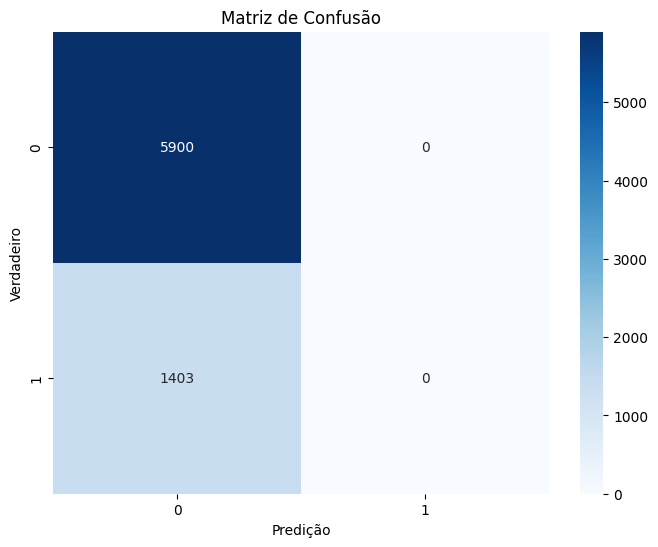

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Impressão das métricas de desempenho
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("------------------------------------")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("------------------------------------")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("------------------------------------")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("------------------------------------")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("------------------------------------")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8073052170340955
Acurácia (Teste): 0.808024099685061
------------------------------------
Acurácia Balanceada (Treino): 0.5021227666725633
Acurácia Balanceada (Teste): 0.5003563791874555
------------------------------------
Precision (Treino): 1.0
Precision (Teste): 1.0
------------------------------------
Recall (Treino): 0.004245533345126481
Recall (Teste): 0.0007127583749109052
------------------------------------
F1-Score (Treino): 0.008455169984146554
F1-Score (Teste): 0.0014245014245014246
------------------------------------
ROCAUC (Treino): 0.8892682178853881
ROCAUC (Teste): 0.5936751754714473
